In [1]:
#load the ADF-STEM frame and compute its gradient.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from scipy.spatial import distance_matrix
from mpl_toolkits.axes_grid1 import AxesGrid

Text(0.5, 1.0, 'ADF STEM frame')

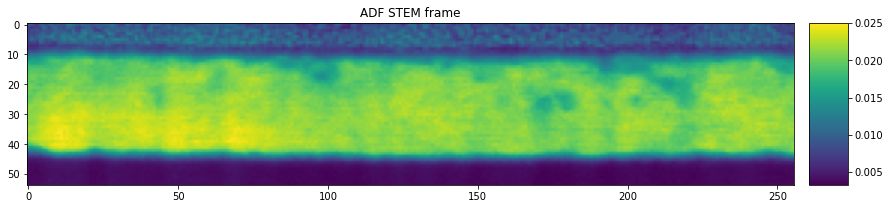

In [2]:
ADF = np.load("ADF.npy")
fig =plt.figure(1, figsize=(50, 50))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(ADF, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("ADF STEM frame")

In [3]:
#generate the gradient of the frame and plot the vector map. 
gy, gx = np.gradient(ADF)
grad = -gx - 1j*gy
grad_mag = np.abs(grad)
grad_angle = np.angle(grad)
grad_mag  = grad_mag/np.max(grad_mag)*2.0
HSVFrame = np.zeros(ADF.shape + (3,), dtype=float)
for i in range(ADF.shape[0]):
    for j in range(ADF.shape[1]):
        HSVFrame[i, j] = grad_angle[i,j] / (2 * np.pi) % 1, 1, grad_mag[i, j]
RGBFrame=hsv_to_rgb(HSVFrame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'ADF gradient')

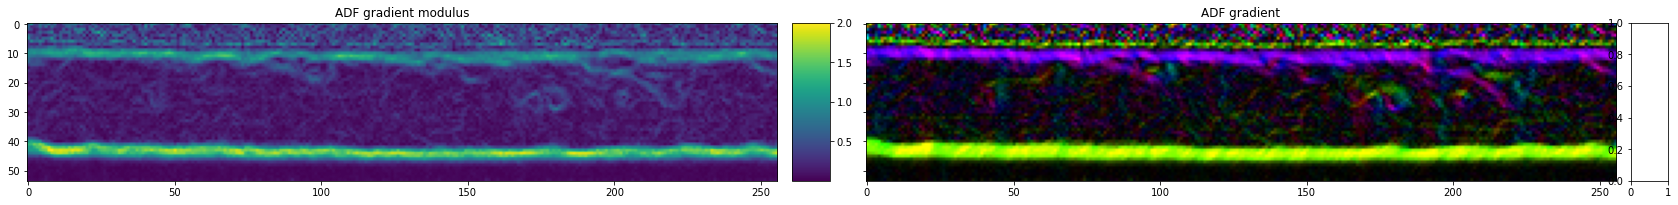

In [5]:
fig =plt.figure(1, figsize=(100, 50))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(grad_mag, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("ADF gradient modulus")
im=grid[1].imshow(RGBFrame)
grid[1].set_title("ADF gradient")